# Mobile Phone Classification
### Author: Kiwoon Hong

### Data: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

### Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

### Load Data

#### Data

In [3]:
df = pd.read_csv('data/mobilephone/train.csv')
df_test = pd.read_csv('data/mobilephone/test.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

#### Target Variable

In [7]:
y = df['price_range']

In [10]:
y.value_counts(normalize = True)

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

<Axes: xlabel='price_range', ylabel='count'>

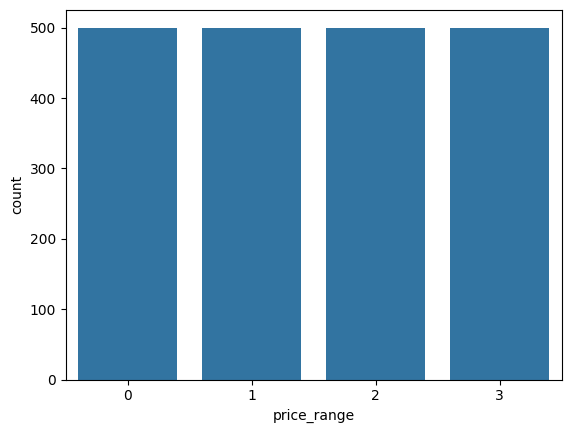

In [11]:
sns.countplot(x = 'price_range', data = df)

In [20]:
### sns.histplot(y) - for numerical targets

#### Glimpse

In [23]:
corr = df.corr()
corr["price_range"].sort_values(ascending = True)

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

<Axes: >

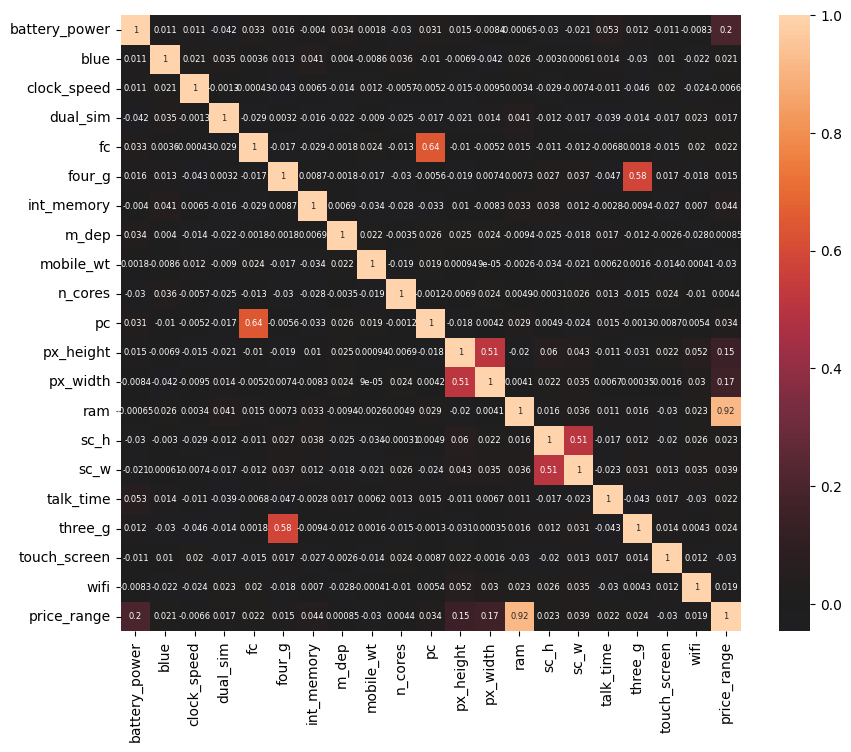

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, center = 0, annot_kws={"size": 6})

In [13]:
### For few features
#plt.figure(figsize = (10, 8))
#sns.pairplot(df)

### EDA + Processing

#### EDA

In [15]:
numeric_cols = df.select_dtypes(include=['int','float']).columns
#categ_cols = df.select_dtypes(include=['object', 'bool']).columns

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

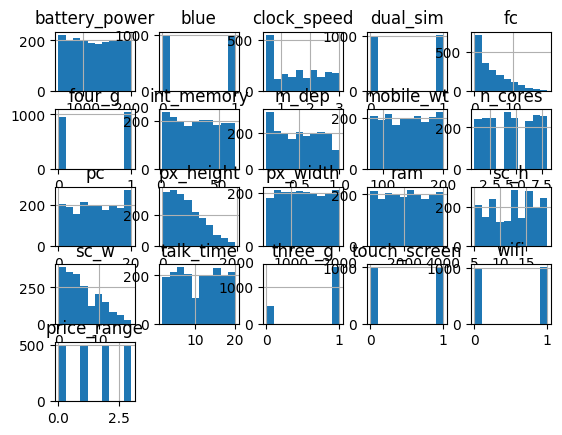

In [16]:
df[numeric_cols].hist()

array([[<Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'px_height'}>],
       [<Axes: title={'center': 'sc_w'}>, <Axes: >]], dtype=object)

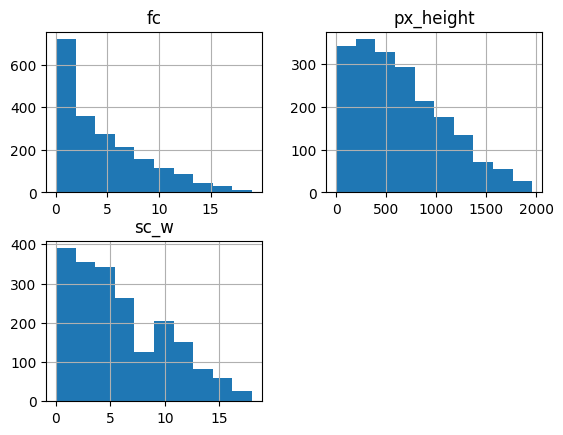

In [25]:
df[['fc','px_height', 'sc_w']].hist()

#### Missing Values

In [26]:
#df['varaiable'] = df.varaiable.fillna(df.variable.mean()) 
#mean(), mode(), ...

#### Feature Selection

In [ ]:
#feat_sel = SelectKBest(f_classif, k=2)
#X_selected = feat_sel.fit_transform(X, y)

#### Processing

In [28]:
### Transformation
df['fc'] = np.log1p(df['fc'])
df['px_height'] = np.log1p(df['px_height'])
df['sc_w'] = np.log1p(df['sc_w'])

array([[<Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'px_height'}>],
       [<Axes: title={'center': 'sc_w'}>, <Axes: >]], dtype=object)

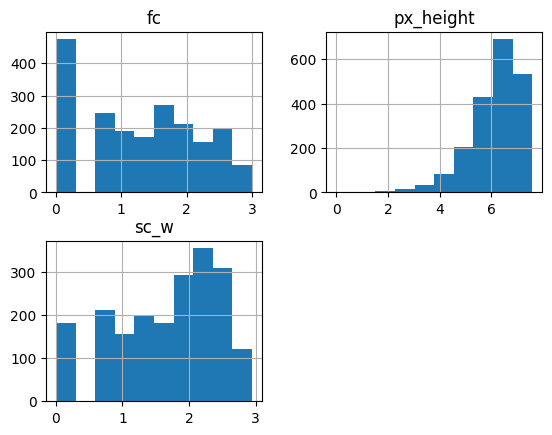

In [29]:
df[['fc','px_height', 'sc_w']].hist()

In [45]:
### Define Columns
X = df.drop(["price_range"], axis = 1)
y = df["price_range"]

categ_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
numeric_cols = [col for col in X.columns if col not in categ_cols]

In [46]:
### Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
### Encoding + Scaling Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        #('cat', OneHotEncoder(handle_unknown='ignore'), categ_cols)
    ],
    remainder='passthrough'
)

X_train_std = preprocessor.fit_transform(X_train)
X_val_std =preprocessor.transform(X_val)

In [57]:
###Option - Transform scaled data(array) to DataFrame
X_scaled_df = pd.DataFrame(X_train_std, columns=numeric_cols + categ_cols, index=X_train.index)
X_scaled_df.head()
X_scaled_df[numeric_cols].hist()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
968,1.548360,-1.236230,0.858379,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.515525,1.181997,-0.580476,-0.528061,0.835949,-1.445123,0.0,1.0,0.0,1.0,1.0,1.0
240,-1.379535,0.837112,-1.415663,0.919763,-1.403674,-0.046246,1.510316,-1.476497,0.150590,-0.556547,1.336453,-0.290196,-1.200749,0.915929,1.0,0.0,1.0,1.0,1.0,1.0
819,-0.010914,-0.748385,-0.214239,1.359577,-1.403674,1.340790,-1.547446,0.685498,0.128057,-1.020159,-0.657302,0.423400,1.167963,1.642407,0.0,1.0,1.0,1.0,0.0,1.0
692,-1.043621,-0.504462,-0.214239,0.315017,-0.357620,1.623858,0.199847,-0.478653,-0.393070,0.984962,1.288322,0.185535,0.702618,-1.081884,0.0,0.0,0.0,0.0,0.0,1.0
420,0.488416,-1.236230,0.858379,-1.389265,-0.357620,-1.008680,0.199847,0.352883,0.584771,-0.336332,-0.489767,-1.479523,0.189513,1.642407,1.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
### Apply to test data

df_test['fc'] = np.log1p(df_test['fc'])
df_test['px_height'] = np.log1p(df_test['px_height'])
df_test['sc_w'] = np.log1p(df_test['sc_w'])

test_std =preprocessor.transform(df_test)

### Modeling